<a href="https://colab.research.google.com/github/alexaziegler/retail-forecasting-with-prophet-and-hex/blob/main/Time_series_forecasting_with_Prophet_for_luxury_retail_brand%C2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"01977519-2eef-7bb1-b33d-2131813996eb\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Time series forecasting with Prophet for luxury retail brand \"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

# Prophet model step by step

### Data processing & Preparation



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

code = """
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
"""

print(code)


import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
file_path = "ecommerce_retail_data.csv"
encodings = ["ISO-8859-1", "latin1"]

for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"Loaded data with encoding: {enc}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {enc}")
else:
    raise ValueError("Unable to read the file with tried encodings.")

Loaded data with encoding: ISO-8859-1


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.dropna(subset=['customerid'])  # Remove rows without customer ID
df = df[df['quantity'] > 0]  # Remove returns/cancellations
df = df[df['unitprice'] > 0]  # Remove free items

code2 = """
df = df.dropna(subset=['customerid'])  # Remove rows without customer ID
df = df[df['quantity'] > 0]  # Remove returns/cancellations
df = df[df['unitprice'] > 0]  # Remove free items
"""

print(code2)


df = df.dropna(subset=['customerid'])  # Remove rows without customer ID
df = df[df['quantity'] > 0]  # Remove returns/cancellations
df = df[df['unitprice'] > 0]  # Remove free items



**Why:  **I'm removing rows without customer ID in case there are any incomplete or system generated records, removing rows where quantity is less than 0 which typically is a return or anywhere the unit price is 0, which can just be dirty data or even free items. Removing these values ensures that data is clean and relevant for prophet model forecast.



In [ ]:
# Calculate total revenue per transaction
df['revenue'] = df['quantity'] * df['unitprice']

# Parse and clean dates
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df = df.sort_values('invoicedate')

# Filter to reasonable date range (remove outliers)
df = df[(df['invoicedate'] >= '2010-12-01') & (df['invoicedate'] <= '2011-12-09')]

code3 = """
# Calculate total revenue per transaction
df['revenue'] = df['quantity'] * df['unitprice']

# Parse and clean dates
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df = df.sort_values('invoicedate')

# Filter to reasonable date range (remove outliers)
df = df[(df['invoicedate'] >= '2010-12-01') & (df['invoicedate'] <= '2011-12-09')]
"""

print(code3)



# Calculate total revenue per transaction
df['revenue'] = df['quantity'] * df['unitprice']

# Parse and clean dates
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df = df.sort_values('invoicedate')

# Filter to reasonable date range (remove outliers)
df = df[(df['invoicedate'] >= '2010-12-01') & (df['invoicedate'] <= '2011-12-09')]



**Why**: Creating a target variable for revenue is a crucial part of the forecasting model. That's why we are here! For this exercise quantity x unit price works as the basis for the new target variable 'revenue'. 🤑

I'm also converting the invoice date column to date time format and sorting chronologically. This step is crucial for prophet to detect patterns in the time series.

Finally, filtering the data (which has over 500k rows) to a targeted timeframe will help with forecast reliability. Even though the new df still has over 300k rows



### Time Series Aggregation



In [ ]:
# Aggregate to daily sales
daily_sales = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique custmers
}).reset_index()

# Rename for prophet format
daily_sales = daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# Ensure daily frequency (aka fill missing dates)
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])
daily_sales = daily_sales.set_index('ds').resample('D').sum().fillna(0).reset_index()

code4 = """
# Aggregate to daily sales
daily_sales = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique custmers
}).reset_index()

# Rename for prophet format
daily_sales = daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# Ensure daily frequency (aka fill missing dates)
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])
daily_sales = daily_sales.set_index('ds').resample('D').sum().fillna(0).reset_index()
"""

print(code4)


# Aggregate to daily sales
daily_sales = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique custmers
}).reset_index()

# Rename for prophet format
daily_sales = daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# Ensure daily frequency (aka fill missing dates)
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])
daily_sales = daily_sales.set_index('ds').resample('D').sum().fillna(0).reset_index()



**Why**: The data was in a extremely granular level of detail format and needs to be structured so that each row represents a single day with each measure (revenue, qty, etc) aggregated per day. This is a crucial step for prophet to detect seasonality.

Also, prophet requires that the date column is 'ds' and target variable is 'y'. prophet won't be able to recognize the correct columns otherwise. Another tweak is making sure that any missing dates are filled in with resampling beause prophet requires that there is no break in the time series data.



### Prophet model configuration



In [ ]:
# Initialize Prophet with retail settings
model = Prophet(
    yearly_seasonality=True,      # Capture seasonal patterns
    weekly_seasonality=True,      # Weekly shopping patterns
    daily_seasonality=False,      # Not meaningful for aggregated daily data
    seasonality_mode='multiplicative',  # Revenue grows with base level
    changepoint_prior_scale=0.05,      # Moderate trend flexibility
    interval_width=0.8           # 80% confidence intervals
)

# Add UK holidays (this is UK retail data)
from prophet.utilities import regressor_coefficients
model.add_country_holidays(country_name='UK')

code_seasonality = """
# Initialize Prophet with retail-specific settings
model = Prophet(
    yearly_seasonality=True,      # Capture seasonal patterns
    weekly_seasonality=True,      # Weekly shopping patterns
    daily_seasonality=False,      # Not meaningful for aggregated daily data
    seasonality_mode='multiplicative',  # Revenue grows with base level
    changepoint_prior_scale=0.05,      # Moderate trend flexibility
    interval_width=0.8           # 80% confidence intervals
)

# Add UK holidays (this is UK retail data)
from prophet.utilities import regressor_coefficients
model.add_country_holidays(country_name='UK')
"""

print(code_seasonality)


# Initialize Prophet with retail-specific settings
model = Prophet(
    yearly_seasonality=True,      # Capture seasonal patterns
    weekly_seasonality=True,      # Weekly shopping patterns
    daily_seasonality=False,      # Not meaningful for aggregated daily data
    seasonality_mode='multiplicative',  # Revenue grows with base level
    changepoint_prior_scale=0.05,      # Moderate trend flexibility
    interval_width=0.8           # 80% confidence intervals
)

# Add UK holidays (this is UK retail data)
from prophet.utilities import regressor_coefficients
model.add_country_holidays(country_name='UK')



**Why**: Since this analysis is for a luxury retail brand, I wanted to incorporate some retail specific prophet settings. Based on my research, for retail industry,  multiplicative seasonality is important because increase/decreases are relative to the baseline rather than an additive increase in dollars or units. For example, in december sales will spike but the total revenue is dependent on baseline sales volume.

For changepoint_prior_scale, this determines how sensitive the prophet model will be to detected trends. For the retail industry, moderate flexibility is good because a one day sharp change (for example, a one day big sales or heavy discount) will not completely change the trend.

Third, interval width or 80% confidence interval is also more realistic for retail. Basically it's saying that there's an 80% probability that the true value will fall between the upper and lower predicted bands. Again, this is based on industry standards for retail.

Finally, I think it's super neat to be able to add in holiday data in this model! Since this is a UK dataset, adding in UK holidays. Retail is an industry very much affected by holidays so this is another valuable step.



In [ ]:
# Add day of week as regressor
daily_sales['day_of_week'] = daily_sales['ds'].dt.dayofweek
daily_sales['is_weekend'] = (daily_sales['day_of_week'] >= 5).astype(int)

# Add month-end effects (common in retail)
daily_sales['is_month_end'] = (daily_sales['ds'].dt.day >= 28).astype(int)

# Add regressors to model
model.add_regressor('is_weekend')
model.add_regressor('is_month_end')

code_regressors = """
# Add day of week as regressor
daily_sales['day_of_week'] = daily_sales['ds'].dt.dayofweek
daily_sales['is_weekend'] = (daily_sales['day_of_week'] >= 5).astype(int)

# Add month-end effects (common in retail)
daily_sales['is_month_end'] = (daily_sales['ds'].dt.day >= 28).astype(int)

# Add regressors to model
model.add_regressor('is_weekend')
model.add_regressor('is_month_end')
"""

print(code_regressors)


# Add day of week as regressor
daily_sales['day_of_week'] = daily_sales['ds'].dt.dayofweek
daily_sales['is_weekend'] = (daily_sales['day_of_week'] >= 5).astype(int)

# Add month-end effects (common in retail)
daily_sales['is_month_end'] = (daily_sales['ds'].dt.day >= 28).astype(int)

# Add regressors to model
model.add_regressor('is_weekend')
model.add_regressor('is_month_end')



**Why**:  Prophet has additional features called regressors that can help capture patterns beyond standard seasonality. For the retail industry there is usually a pattern during end of the month and weekends. So using regressors to tell prophet to add this as additional predictors. I need to explore regressors further because so many more features can be added like promotions, weather...or maybe tariffs?!? 😬



### Model Training & Forecasting



In [ ]:
# Fit the model
model.fit(daily_sales[['ds', 'y', 'is_weekend', 'is_month_end']])

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # 30-day forecast

# Add regressor values for future dates
future['day_of_week'] = future['ds'].dt.dayofweek
future['is_weekend'] = (future['day_of_week'] >= 5).astype(int)
future['is_month_end'] = (future['ds'].dt.day >= 28).astype(int)

# generate forecast (it's happening!)
forecast = model.predict(future)

code5 = """
# Fit the model
model.fit(daily_sales[['ds', 'y', 'is_weekend', 'is_month_end']])

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # 30-day forecast

# Add regressor values for future dates
future['day_of_week'] = future['ds'].dt.dayofweek
future['is_weekend'] = (future['day_of_week'] >= 5).astype(int)
future['is_month_end'] = (future['ds'].dt.day >= 28).astype(int)

# generate forecast (it's happening!)
forecast = model.predict(future)
"""

print(code5)

15:34:59 - cmdstanpy - INFO - Chain [1] start processing
15:34:59 - cmdstanpy - INFO - Chain [1] done processing

# Fit the model
model.fit(daily_sales[['ds', 'y', 'is_weekend', 'is_month_end']])

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # 30-day forecast

# Add regressor values for future dates
future['day_of_week'] = future['ds'].dt.dayofweek
future['is_weekend'] = (future['day_of_week'] >= 5).astype(int)
future['is_month_end'] = (future['ds'].dt.day >= 28).astype(int)

# generate forecast (it's happening!)
forecast = model.predict(future)



**Why**: I'm training the model with daily sales 'y', day 'ds', and the regressors I just described. The next part is to create a dataframe for the future 🔮 This dataframe is looking at 30 days into the future. For retail, 30 days is the ideal forecasting period. The other part is calculating regressors for the future period.

For this exercise I'm keeping the forecast at 30 days but I'm really curious about seeing how far into the future I can push the forecast before it starts breaking down.

The final step is generating the forecast.



### Model evaluation

In [ ]:
# Cross-validation
from prophet.diagnostics import cross_validation, performance_metrics

# Use last 30 days for validation
cutoff_date = daily_sales['ds'].max() - pd.Timedelta(days=30)
train_data = daily_sales[daily_sales['ds'] <= cutoff_date]
test_data = daily_sales[daily_sales['ds'] > cutoff_date]

# Retrain on training data
model_cv = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)
model_cv.add_country_holidays(country_name='UK')
model_cv.add_regressor('is_weekend')
model_cv.add_regressor('is_month_end')
model_cv.fit(train_data[['ds', 'y', 'is_weekend', 'is_month_end']])

# Predict on test period
future_cv = test_data[['ds', 'is_weekend', 'is_month_end']].copy()
forecast_cv = model_cv.predict(future_cv)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(test_data['y'], forecast_cv['yhat'])
mape = mean_absolute_percentage_error(test_data['y'], forecast_cv['yhat'])

print(f"MAE: £{mae:.2f}")
print(f"MAPE: {mape:.2%}")


15:34:59 - cmdstanpy - INFO - Chain [1] start processing
15:34:59 - cmdstanpy - INFO - Chain [1] done processing
MAE: £30729.04
MAPE: 2167804439936847577088.00%


**Why: **Now it's time to evaluate the model and see how it performs on new, unseen data. This process is called cross validation.

First part is splitting the data into train and test. Then model is retrained on the training data for this process. Then the model will predict the next 30 days and compared to the last 30 days which were set aside as the test data. MAE and MAPE are measures of how close the predicted value was to the forecasted value.

**Results**:

The resulting MAE or mean absolutel error was £30729.04, so my predictions are off by ~30k a day. This is not good considering average daily sales is 23k in this dataset.

The resulting MAPE or mean absolute percentage error was 2167804439936847577088.00%. Crying, this is basically worthless. But it should be something like "prediction is off by 10%". I did read that MAPE for retail and ecomm data is hard to come by since there are typically actual values that are close to zero...



In [ ]:
from sklearn.metrics import median_absolute_error, mean_squared_error
import numpy as np

# Cross-validation setup
cutoff_date = daily_sales['ds'].max() - pd.Timedelta(days=30)
train_data = daily_sales[daily_sales['ds'] <= cutoff_date]
test_data = daily_sales[daily_sales['ds'] > cutoff_date]

# Retrain on training data
model_cv = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)
model_cv.add_country_holidays(country_name='UK')
model_cv.add_regressor('is_weekend')
model_cv.add_regressor('is_month_end')
model_cv.fit(train_data[['ds', 'y', 'is_weekend', 'is_month_end']])

# Predict on test period
future_cv = test_data[['ds', 'is_weekend', 'is_month_end']].copy()
forecast_cv = model_cv.predict(future_cv)

# Calculate MedAE and RMSE
medae = median_absolute_error(test_data['y'], forecast_cv['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_cv['yhat']))

print(f"Median Absolute Error (MedAE): £{medae:.2f}")
print(f"Root Mean Squared Error (RMSE): £{rmse:.2f}")


15:37:27 - cmdstanpy - INFO - Chain [1] start processing
15:37:27 - cmdstanpy - INFO - Chain [1] done processing
Median Absolute Error (MedAE): £28911.13
Root Mean Squared Error (RMSE): £35606.00


In [ ]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2010-12-01,22591.622134,22966.833299,47301.474572,22591.622134,22591.622134,0.0,0.0,0.0,0.0,...,0.145125,0.145125,0.145125,0.426286,0.426286,0.426286,0.0,0.0,0.0,35500.726891
1,2010-12-02,22589.924580,28204.727614,53992.483991,22589.924580,22589.924580,0.0,0.0,0.0,0.0,...,0.421758,0.421758,0.421758,0.430730,0.430730,0.430730,0.0,0.0,0.0,41847.574882
2,2010-12-03,22588.227026,19414.042542,44748.340034,22588.227026,22588.227026,0.0,0.0,0.0,0.0,...,-0.024029,-0.024029,-0.024029,0.430444,0.430444,0.430444,0.0,0.0,0.0,31768.426386
3,2010-12-04,22586.529472,-5089.164608,20855.972832,22586.529472,22586.529472,0.0,0.0,0.0,0.0,...,-0.726477,-0.726477,-0.726477,0.424825,0.424825,0.424825,0.0,0.0,0.0,8568.924186
4,2010-12-05,22584.831918,9769.325583,35078.954520,22584.831918,22584.831918,0.0,0.0,0.0,0.0,...,-0.109186,-0.109186,-0.109186,0.413376,0.413376,0.413376,0.0,0.0,0.0,22251.124197


In [ ]:
merged = pd.merge(forecast, daily_sales[['ds', 'y']], on='ds', how='left')

code5 = """
merged = pd.merge(forecast, daily_sales[['ds', 'y']], on='ds', how='left')
"""

print(code5)


merged = pd.merge(forecast, daily_sales[['ds', 'y']], on='ds', how='left')



In [ ]:
merged.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (observed),...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,y
0,2010-12-01,22591.622134,22966.833299,47301.474572,22591.622134,22591.622134,0.0,0.0,0.0,0.0,...,0.145125,0.145125,0.426286,0.426286,0.426286,0.0,0.0,0.0,35500.726891,46376.49
1,2010-12-02,22589.924580,28204.727614,53992.483991,22589.924580,22589.924580,0.0,0.0,0.0,0.0,...,0.421758,0.421758,0.430730,0.430730,0.430730,0.0,0.0,0.0,41847.574882,47316.53
2,2010-12-03,22588.227026,19414.042542,44748.340034,22588.227026,22588.227026,0.0,0.0,0.0,0.0,...,-0.024029,-0.024029,0.430444,0.430444,0.430444,0.0,0.0,0.0,31768.426386,23921.71
3,2010-12-04,22586.529472,-5089.164608,20855.972832,22586.529472,22586.529472,0.0,0.0,0.0,0.0,...,-0.726477,-0.726477,0.424825,0.424825,0.424825,0.0,0.0,0.0,8568.924186,0.00
4,2010-12-05,22584.831918,9769.325583,35078.954520,22584.831918,22584.831918,0.0,0.0,0.0,0.0,...,-0.109186,-0.109186,0.413376,0.413376,0.413376,0.0,0.0,0.0,22251.124197,31771.60


#### Outcome 1: My model is not performing super well but still going to finish this up for the portfolio. I have a funny feeling, that the HUGE spike of y on 9/20/11 in the data is causing a severe downward trend and causing predicted values (yhat) to be very off. Tomorrow, will try with that day removed or create an additional regressor to resolve.

## Forecast model update
### Retraining on new df without outliers

In [ ]:
# 1. Aggregate to daily sales
daily_sales_no_outliers = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique customers
}).reset_index()

# 2. Remove outliers from daily_sales based on revenue (IQR method)
Q1 = daily_sales_no_outliers['revenue'].quantile(0.25)
Q3 = daily_sales_no_outliers['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_daily_sales = daily_sales_no_outliers[
    (daily_sales_no_outliers['revenue'] >= lower_bound) &
    (daily_sales_no_outliers['revenue'] <= upper_bound)
]

# 3. Rename for prophet format
filtered_daily_sales = filtered_daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# 4 removing y=0
filtered_daily_sales_final = filtered_daily_sales[filtered_daily_sales['y'] != 0]


code_no_outliers = """
# 1. Aggregate to daily sales
daily_sales_no_outliers = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique customers
}).reset_index()

# 2. Remove outliers from daily_sales based on revenue (IQR method)
Q1 = daily_sales_no_outliers['revenue'].quantile(0.25)
Q3 = daily_sales_no_outliers['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_daily_sales = daily_sales_no_outliers[
    (daily_sales_no_outliers['revenue'] >= lower_bound) &
    (daily_sales_no_outliers['revenue'] <= upper_bound)
]

# 3. Rename for prophet format
filtered_daily_sales = filtered_daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# 4. Ensure daily frequency (fill missing dates)
filtered_daily_sales['ds'] = pd.to_datetime(filtered_daily_sales['ds'])
filtered_daily_sales = filtered_daily_sales.set_index('ds').resample('D').sum().fillna(0).reset_index()
"""

print(code_no_outliers)


# 1. Aggregate to daily sales
daily_sales_no_outliers = df.groupby(df['invoicedate'].dt.date).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'invoiceno': 'nunique',  # Number of unique transactions
    'customerid': 'nunique'   # Number of unique customers
}).reset_index()

# 2. Remove outliers from daily_sales based on revenue (IQR method)
Q1 = daily_sales_no_outliers['revenue'].quantile(0.25)
Q3 = daily_sales_no_outliers['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_daily_sales = daily_sales_no_outliers[
    (daily_sales_no_outliers['revenue'] >= lower_bound) &
    (daily_sales_no_outliers['revenue'] <= upper_bound)
]

# 3. Rename for prophet format
filtered_daily_sales = filtered_daily_sales.rename(columns={
    'invoicedate': 'ds',
    'revenue': 'y'
})

# 4. Ensure daily frequency (fill missing dates)
filtered_daily_sales['ds'] = pd.to_datetime(filtered_daily_sales['ds'])
filtered_daily_s

In [ ]:
model3 = Prophet(
    yearly_seasonality=True,      # Capture seasonal patterns
    weekly_seasonality=True,      # Weekly shopping patterns
    daily_seasonality=False,      # Not meaningful for aggregated daily data
    seasonality_mode='multiplicative',  # Revenue grows with base level
    changepoint_prior_scale=0.05,      # Moderate trend flexibility
    interval_width=0.8           # 80% confidence intervals
)

# Add UK holidays (this is UK retail data)
from prophet.utilities import regressor_coefficients
model3.add_country_holidays(country_name='UK')

In [ ]:
# Add day of week as regressor
filtered_daily_sales_final["ds"] = pd.to_datetime(filtered_daily_sales_final["ds"])
filtered_daily_sales_final["day_of_week3"] = filtered_daily_sales_final[
    "ds"
].dt.dayofweek
filtered_daily_sales_final["is_weekend3"] = (
    filtered_daily_sales_final["day_of_week3"] >= 5
).astype(int)

# Add month-end effects (common in retail)
filtered_daily_sales_final["is_month_end3"] = (
    filtered_daily_sales_final["ds"].dt.day >= 28
).astype(int)

# Add regressors to model
model3.add_regressor("is_weekend3")
model3.add_regressor("is_month_end3")

In [ ]:
# Fit the model
model3.fit(filtered_daily_sales_final[['ds', 'y', 'is_weekend3', 'is_month_end3']])

# Create future dataframe
future2 = model3.make_future_dataframe(periods=30)  # 30-day forecast

# Add regressor values for future dates
future2['day_of_week3'] = future2['ds'].dt.dayofweek
future2['is_weekend3'] = (future2['day_of_week3'] >= 5).astype(int)
future2['is_month_end3'] = (future2['ds'].dt.day >= 28).astype(int)

# generate forecast (it's happening!)
forecast2 = model3.predict(future2)

15:42:58 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
# Cross-validation setup
cutoff_date = filtered_daily_sales_final['ds'].max() - pd.Timedelta(days=30)
train_data3 = filtered_daily_sales_final[filtered_daily_sales_final['ds'] <= cutoff_date]
test_data3 = filtered_daily_sales_final[filtered_daily_sales_final['ds'] > cutoff_date]

# Retrain on training data
model_cv3 = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)
model_cv3.add_country_holidays(country_name='UK')
model_cv3.add_regressor('is_weekend3')
model_cv3.add_regressor('is_month_end3')
model_cv3.fit(train_data3[['ds', 'y', 'is_weekend3', 'is_month_end3']])

# Predict on test period
future_cv3 = test_data3[['ds', 'is_weekend3', 'is_month_end3']].copy()
forecast_cv3 = model_cv3.predict(future_cv3)

# Calculate MedAE and RMSE
medae3 = median_absolute_error(test_data3['y'], forecast_cv3['yhat'])
rmse3 = np.sqrt(mean_squared_error(test_data3['y'], forecast_cv3['yhat']))

print(f"Median Absolute Error (MedAE): £{medae:.2f}")
print(f"Root Mean Squared Error (RMSE): £{rmse:.2f}")


15:43:04 - cmdstanpy - INFO - Chain [1] start processing
15:43:04 - cmdstanpy - INFO - Chain [1] done processing
Median Absolute Error (MedAE): £28911.13
Root Mean Squared Error (RMSE): £35606.00


In [ ]:
filtered_daily_sales_final

In [ ]:
import plotly.graph_objects as go

fig4 = go.Figure()

# Add actual data
fig4.add_trace(go.Scatter(
    x=filtered_daily_sales_final['ds'],
    y=filtered_daily_sales_final['y'],
    mode='lines',
    name='Actual Revenue',
    line=dict(color='purple')
))

# Add forecast
forecast_future2 = forecast2[forecast2['ds'] > filtered_daily_sales_final['ds'].max()]
fig4.add_trace(go.Scatter(
    x=forecast_future2['ds'],
    y=forecast_future2['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='pink')
))

# Add confidence intervals
fig4.add_trace(go.Scatter(
    x=forecast_future2['ds'],
    y=forecast_future2['yhat_upper'],
    fill=None,
    mode='lines',
    line_color='rgba(0,0,0,0)',
    showlegend=True
))
fig4.add_trace(go.Scatter(
    x=forecast_future2['ds'],
    y=forecast_future2['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line_color='rgba(0,0,0,0)',
    name='Confidence Interval',
    fillcolor='rgba(255,0,0,0.2)'
))

fig4.update_layout(
    title='30-Day Revenue Forecast with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Daily Revenue (£)',
    hovermode='x unified'
)

fig4.show()


## Final Forecast Model Interpretation

### Improvement from 1st pass to 2nd pass
By removing outliers and rows where actual revenue = 0, my model improved. The forecast (pink shaded area) now shows reasonable values based on historical patterns and the forecast does not dip heavily into negative values like before.

### seasonality capture
The model appears to have captured the high volatility and seasonal patterns in the new filtered data well. The actual revenue shows significant day-to-day variation (£5k to £60k range), and the forecast confidence intervals now appropriately reflect this uncertainty.

### business application
The confidence intervals can be used for planning. The wide bands reflect the genuine uncertainty in a volatile revenue stream, which is valuable information for business decision-making.

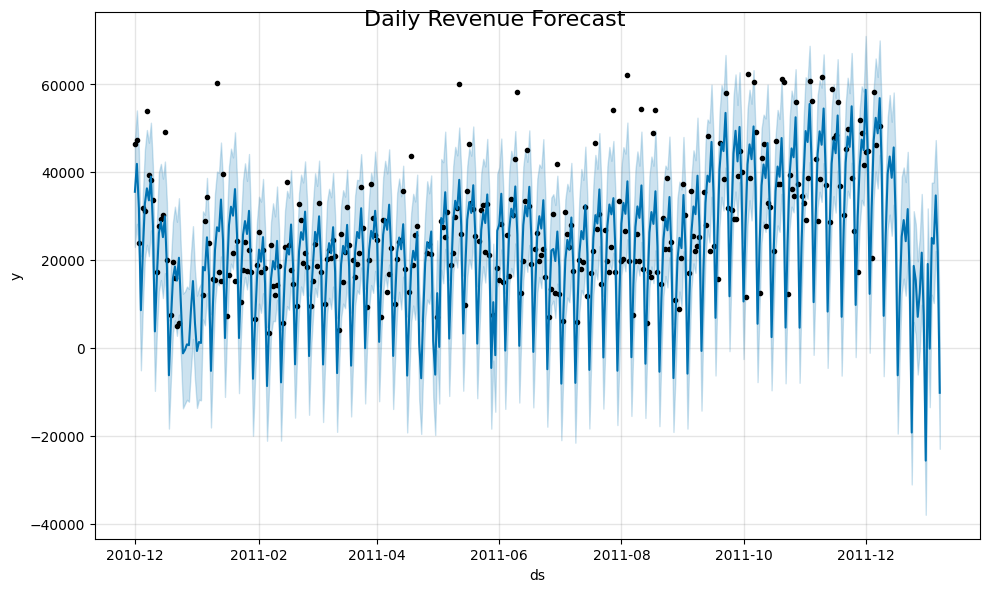

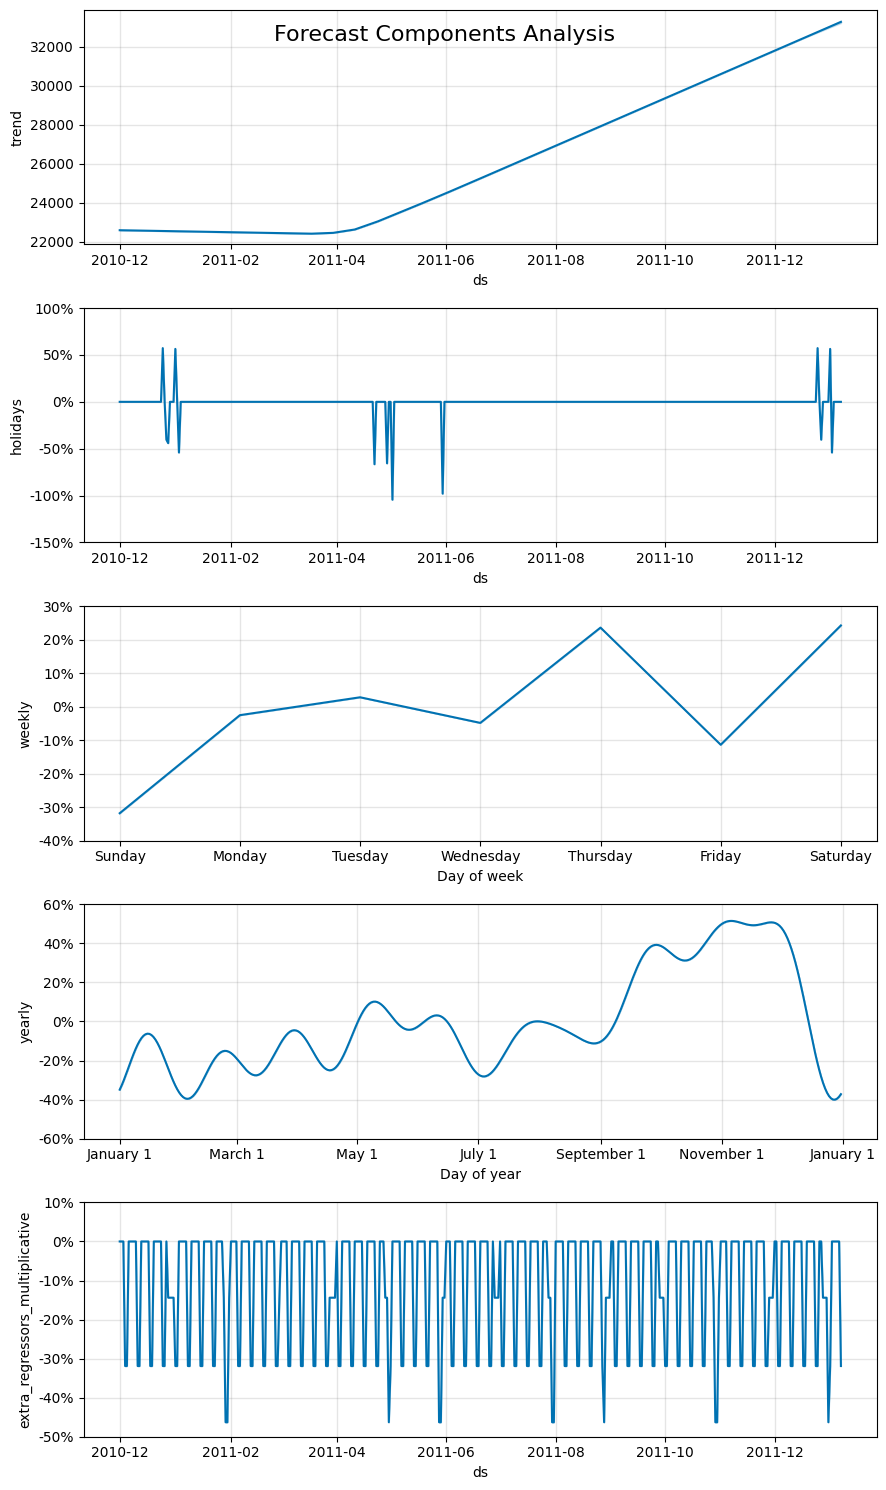

In [ ]:
# Main forecast plot
fig1 = model.plot(forecast)
fig1.suptitle('Daily Revenue Forecast', fontsize=16)

# Components plot
fig2 = model.plot_components(forecast)
fig2.suptitle('Forecast Components Analysis', fontsize=16)

# Interactive Plotly version
fig3 = go.Figure()

# Add actual data
fig3.add_trace(go.Scatter(
    x=daily_sales['ds'],
    y=daily_sales['y'],
    mode='lines',
    name='Actual Revenue',
    line=dict(color='purple')
))

# Add forecast
forecast_future = forecast[forecast['ds'] > daily_sales['ds'].max()]
fig3.add_trace(go.Scatter(
    x=forecast_future['ds'],
    y=forecast_future['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='pink')
))

# Add confidence intervals
fig3.add_trace(go.Scatter(
    x=forecast_future['ds'],
    y=forecast_future['yhat_upper'],
    fill=None,
    mode='lines',
    line_color='rgba(0,0,0,0)',
    showlegend=True
))

fig3.add_trace(go.Scatter(
    x=forecast_future['ds'],
    y=forecast_future['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line_color='rgba(0,0,0,0)',
    name='Confidence Interval',
    fillcolor='rgba(255,0,0,0.2)'
))

fig3.update_layout(
    title='30-Day Revenue Forecast with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Daily Revenue (£)',
    hovermode='x unified'
)

fig3.show()

### Creating a summary for key insights

In [ ]:
# Key insights summary
forecast_summary = forecast_future.groupby(forecast_future['ds'].dt.dayofweek).agg({
    'yhat': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).round(2)

forecast_summary.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
print("Average Daily Forecast by Day of Week:")
print(forecast_summary)

# Monthly projections
monthly_forecast = forecast_future.groupby(forecast_future['ds'].dt.to_period('M')).agg({
    'yhat': 'sum',
    'yhat_lower': 'sum',
    'yhat_upper': 'sum'
}).round(2)

print(f"\nMonthly Revenue Projection:")
print(monthly_forecast)


Average Daily Forecast by Day of Week:
         yhat  yhat_lower  yhat_upper
Mon  20054.02     7162.25    33060.08
Tue  26162.11    13025.90    38939.80
Wed  24769.14    11729.95    37986.83
Thu  33367.86    20989.77    46222.71
Fri  23022.02    10300.21    35753.18
Sat -10801.24   -23565.73     1993.01
Sun  18748.30     5939.68    31340.81

Monthly Revenue Projection:
              yhat  yhat_lower  yhat_upper
ds                                        
2011-12  439639.48   146046.84   734625.27
2012-01  113870.12    23015.75   204306.66


**Why**: Day-of-week and monthly aggregations are exec friendly and nice and tidy



## Experimenting with Hex Visualizations

In [ ]:
monthly_forecast

In [ ]:
monthly_forecast

In [ ]:
monthly_forecast

In [ ]:
daily_sales

In [ ]:
import altair
chart_merged = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_01977edc-1c9f-7aa8-868b-9a5c6592d25e",
                    "layer": [
                        {
                            "description": "line series layer",
                            "transform": [
                                {
                                    "fold": [
                                        "y",
                                        "yhat",
                                        "yhat_upper",
                                        "yhat_lower"
                                    ],
                                    "as": [
                                        "CHART_FOLD_KEYS",
                                        "CHART_FOLD_VALUES"
                                    ]
                                },
                                {
                                    "calculate": "if(datum[\"CHART_FOLD_KEYS\"] === \"y\", \"y\", if(datum[\"CHART_FOLD_KEYS\"] === \"yhat\", \"yhat\", if(datum[\"CHART_FOLD_KEYS\"] === \"yhat_upper\", \"yhat_upper\", if(datum[\"CHART_FOLD_KEYS\"] === \"yhat_lower\", \"yhat_lower\", \"\"))))",
                                    "as": "CHART_FOLD_KEYS"
                                },
                                {
                                    "joinaggregate": [
                                        {
                                            "field": "CHART_FOLD_VALUES",
                                            "op": "sum",
                                            "as": "sum_y_by_x"
                                        }
                                    ],
                                    "groupby": [
                                        "ds"
                                    ]
                                },
                                {
                                    "calculate": "toDate(datum[\"ds\"])",
                                    "as": "ds"
                                },
                                {
                                    "filter": "isValid(datum[\"ds\"])"
                                }
                            ],
                            "layer": [
                                {
                                    "description": "line mark layer",
                                    "mark": {
                                        "type": "line",
                                        "point": false,
                                        "clip": true,
                                        "strokeCap": "square",
                                        "strokeJoin": "round",
                                        "cursor": "crosshair"
                                    },
                                    "params": [
                                        {
                                            "name": "interval_intervalselection_0",
                                            "select": {
                                                "type": "interval",
                                                "encodings": [
                                                    "x"
                                                ],
                                                "zoom": false,
                                                "mark": {
                                                    "fill": "#669EFF",
                                                    "fillOpacity": 0.07,
                                                    "stroke": "#669EFF",
                                                    "strokeOpacity": 0.4
                                                }
                                            }
                                        },
                                        {
                                            "name": "legend_pointselection_0",
                                            "select": {
                                                "type": "point",
                                                "encodings": [
                                                    "color"
                                                ]
                                            },
                                            "bind": "legend"
                                        },
                                        {
                                            "name": "legend_pointhover_0",
                                            "select": {
                                                "type": "point",
                                                "encodings": [
                                                    "color"
                                                ]
                                            },
                                            "bind": "legend"
                                        }
                                    ],
                                    "encoding": {
                                        "opacity": {
                                            "value": 1
                                        }
                                    }
                                },
                                {
                                    "description": "line point mark layer",
                                    "mark": {
                                        "type": "point",
                                        "filled": true,
                                        "clip": true
                                    },
                                    "encoding": {
                                        "size": {
                                            "value": 50
                                        },
                                        "opacity": {
                                            "condition": {
                                                "test": {
                                                    "or": [
                                                        {
                                                            "param": "legend_pointhover_0",
                                                            "empty": false
                                                        }
                                                    ],
                                                    "empty": false
                                                },
                                                "value": 1
                                            },
                                            "value": 0
                                        }
                                    }
                                },
                                {
                                    "description": "pivot tooltip point mark layer",
                                    "mark": {
                                        "type": "point",
                                        "tooltip": true,
                                        "clip": true
                                    },
                                    "encoding": {
                                        "opacity": {
                                            "value": 0,
                                            "condition": {
                                                "param": "pivot_hover_01977edc-1c9f-7aa8-868b-9a5c6592d25e",
                                                "value": 1,
                                                "empty": false
                                            }
                                        },
                                        "size": {
                                            "value": 80
                                        },
                                        "tooltip": [
                                            {
                                                "field": "ds",
                                                "type": "temporal",
                                                "timeUnit": "yearmonthdate",
                                                "title": "Date"
                                            },
                                            {
                                                "field": "CHART_FOLD_VALUES",
                                                "type": "quantitative",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "Revenue"
                                            },
                                            {
                                                "field": "CHART_FOLD_KEYS",
                                                "type": "ordinal",
                                                "title": "Y-Axis Field"
                                            }
                                        ]
                                    },
                                    "params": [
                                        {
                                            "name": "pivot_hover_01977edc-1c9f-7aa8-868b-9a5c6592d25e",
                                            "select": {
                                                "type": "point",
                                                "on": "mouseover",
                                                "clear": "mouseout",
                                                "nearest": true,
                                                "fields": [
                                                    "ds",
                                                    "CHART_FOLD_KEYS",
                                                    "CHART_FOLD_KEYS"
                                                ]
                                            }
                                        }
                                    ]
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "ds",
                                    "type": "temporal",
                                    "title": "Date",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "tickCount": {
                                            "expr": "length(domain('x')) > 0 ? min(ceil(width / 40), ceil((domain('x')[1] - domain('x')[0]) / 86400000)) : ceil(width / 40)"
                                        },
                                        "labels": true,
                                        "labelFlush": false
                                    },
                                    "timeUnit": "yearmonthdate"
                                },
                                "y": {
                                    "field": "CHART_FOLD_VALUES",
                                    "type": "quantitative",
                                    "title": "Revenue",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                },
                                "color": {
                                    "field": "CHART_FOLD_KEYS",
                                    "scale": {
                                        "range": [
                                            "#4C78A8",
                                            "#F58518",
                                            "#E45756",
                                            "#72B7B2",
                                            "#54A24B",
                                            "#EECA3B",
                                            "#B279A2",
                                            "#FF9DA6",
                                            "#9D755D",
                                            "#BAB0AC"
                                        ]
                                    },
                                    "sort": {
                                        "field": "CHART_FOLD_KEYS",
                                        "order": "ascending"
                                    },
                                    "legend": {
                                        "symbolOpacity": 1,
                                        "symbolType": "stroke"
                                    },
                                    "title": "Y-Axis Field"
                                },
                                "detail": [
                                    {
                                        "field": "CHART_FOLD_KEYS",
                                        "type": "ordinal",
                                        "title": "Y-Axis Field"
                                    }
                                ]
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {
            "interval_intervalselection_0": {
                "type": "interval",
                "datetimeFields": [
                    "yearmonthdate_ds"
                ],
                "derived": [
                    {
                        "type": "timeunit",
                        "sourceName": "ds",
                        "derivedName": "yearmonthdate_ds",
                        "timeUnit": "yearmonthdate"
                    }
                ]
            }
        },
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Y-Axis Field",
            "CHART_FOLD_VALUES": "Values"
        }
    }
}
""")
chart_merged.datasets.layer00 = merged.to_json(orient='records')
chart_merged.display(actions=False)

In [ ]:
import altair
chart_merged = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_01977ef1-8407-7aa8-869a-04106f1eefae",
                    "layer": [
                        {
                            "description": "bar series layer",
                            "transform": [
                                {
                                    "fold": [
                                        "y",
                                        "yhat"
                                    ],
                                    "as": [
                                        "CHART_FOLD_KEYS",
                                        "CHART_FOLD_VALUES"
                                    ]
                                },
                                {
                                    "calculate": "if(datum[\"CHART_FOLD_KEYS\"] === \"y\", \"y\", if(datum[\"CHART_FOLD_KEYS\"] === \"yhat\", \"yhat\", \"\"))",
                                    "as": "CHART_FOLD_KEYS"
                                },
                                {
                                    "joinaggregate": [
                                        {
                                            "field": "CHART_FOLD_VALUES",
                                            "op": "sum",
                                            "as": "sum_y_by_x"
                                        }
                                    ],
                                    "groupby": [
                                        "ds"
                                    ]
                                },
                                {
                                    "filter": "isValid(datum[\"ds\"])"
                                }
                            ],
                            "layer": [
                                {
                                    "description": "bar mark layer",
                                    "mark": {
                                        "type": "bar",
                                        "clip": true,
                                        "filled": true,
                                        "cursor": "default",
                                        "orient": "vertical"
                                    },
                                    "params": [
                                        {
                                            "name": "interval_intervalselection_0",
                                            "select": {
                                                "type": "interval",
                                                "encodings": [
                                                    "x"
                                                ],
                                                "mark": {
                                                    "fill": "#669EFF",
                                                    "fillOpacity": 0.07,
                                                    "stroke": "#669EFF",
                                                    "strokeOpacity": 0.4
                                                },
                                                "zoom": false
                                            }
                                        },
                                        {
                                            "name": "legend_pointselection_0",
                                            "select": {
                                                "type": "point",
                                                "encodings": [
                                                    "color"
                                                ]
                                            },
                                            "bind": "legend"
                                        },
                                        {
                                            "name": "legend_pointhover_0",
                                            "select": {
                                                "type": "point",
                                                "encodings": [
                                                    "color"
                                                ]
                                            },
                                            "bind": "legend"
                                        }
                                    ],
                                    "encoding": {
                                        "opacity": {
                                            "field": "yhat",
                                            "type": "quantitative",
                                            "legend": null
                                        },
                                        "tooltip": [
                                            {
                                                "field": "ds",
                                                "type": "ordinal",
                                                "timeUnit": "yearmonth",
                                                "title": "Month"
                                            },
                                            {
                                                "field": "CHART_FOLD_VALUES",
                                                "type": "quantitative",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "FINANCIAL",
                                                    "currency": "GBP",
                                                    "columnType": "NUMBER",
                                                    "showSeparators": true,
                                                    "numDecimalDigits": 0,
                                                    "abbreviateLargeNumbers": false,
                                                    "nanFormat": ""
                                                },
                                                "title": "Revenue"
                                            },
                                            {
                                                "field": "CHART_FOLD_KEYS",
                                                "type": "ordinal",
                                                "title": "Y-Axis Field"
                                            }
                                        ],
                                        "color": {
                                            "field": "CHART_FOLD_KEYS",
                                            "scale": {
                                                "range": [
                                                    "#4C78A8",
                                                    "#F58518",
                                                    "#E45756",
                                                    "#72B7B2",
                                                    "#54A24B",
                                                    "#EECA3B",
                                                    "#B279A2",
                                                    "#FF9DA6",
                                                    "#9D755D",
                                                    "#BAB0AC"
                                                ]
                                            },
                                            "sort": {
                                                "field": "CHART_FOLD_KEYS",
                                                "order": "ascending"
                                            },
                                            "legend": {
                                                "symbolOpacity": 1
                                            },
                                            "title": "Y-Axis Field"
                                        },
                                        "detail": [
                                            {
                                                "field": "CHART_FOLD_KEYS",
                                                "type": "ordinal",
                                                "title": "Y-Axis Field"
                                            }
                                        ],
                                        "x": {
                                            "field": "ds",
                                            "type": "ordinal",
                                            "title": "Month",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "gridDash": [
                                                    5,
                                                    5
                                                ],
                                                "ticks": true,
                                                "tickCount": {
                                                    "expr": "length(domain('x')) > 0 ? min(ceil(width / 40), ceil((domain('x')[1] - domain('x')[0]) / 2592000000)) : ceil(width / 40)"
                                                },
                                                "labels": true,
                                                "labelFlush": false,
                                                "labelOverlap": "greedy"
                                            },
                                            "timeUnit": "yearmonth",
                                            "bandPosition": 0
                                        },
                                        "y": {
                                            "field": "CHART_FOLD_VALUES",
                                            "type": "quantitative",
                                            "title": "Revenue",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "format": "FINANCIAL",
                                                    "currency": "GBP",
                                                    "columnType": "NUMBER",
                                                    "showSeparators": true,
                                                    "numDecimalDigits": 0,
                                                    "abbreviateLargeNumbers": false,
                                                    "nanFormat": ""
                                                },
                                                "formatType": "NUMBER_FORMATTER"
                                            },
                                            "stack": "zero"
                                        }
                                    }
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "ds",
                                    "type": "ordinal",
                                    "title": "Month",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "gridDash": [
                                            5,
                                            5
                                        ],
                                        "ticks": true,
                                        "tickCount": {
                                            "expr": "length(domain('x')) > 0 ? min(ceil(width / 40), ceil((domain('x')[1] - domain('x')[0]) / 2592000000)) : ceil(width / 40)"
                                        },
                                        "labels": true,
                                        "labelFlush": false,
                                        "labelOverlap": "greedy"
                                    },
                                    "timeUnit": "yearmonth"
                                },
                                "y": {
                                    "field": "CHART_FOLD_VALUES",
                                    "type": "quantitative",
                                    "title": "Revenue",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "FINANCIAL",
                                            "currency": "GBP",
                                            "columnType": "NUMBER",
                                            "showSeparators": true,
                                            "numDecimalDigits": 0,
                                            "abbreviateLargeNumbers": false,
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    },
                                    "stack": "zero"
                                },
                                "xOffset": {
                                    "field": "CHART_FOLD_KEYS",
                                    "sort": {
                                        "field": "CHART_FOLD_KEYS",
                                        "order": "ascending"
                                    }
                                }
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {
            "interval_intervalselection_0": {
                "type": "interval",
                "datetimeFields": [
                    "yearmonth_ds"
                ],
                "derived": [
                    {
                        "type": "timeunit",
                        "sourceName": "ds",
                        "derivedName": "yearmonth_ds",
                        "timeUnit": "yearmonth"
                    }
                ]
            }
        },
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Y-Axis Field",
            "CHART_FOLD_VALUES": "Values"
        }
    }
}
""")
chart_merged.datasets.layer00 = merged.to_json(orient='records')
chart_merged.display(actions=False)

In [ ]:
import altair
chart_forecast_summary = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [],
    "config": {
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    }
}
""")
chart_forecast_summary.datasets.layer00 = forecast_summary.to_json(orient='records')
chart_forecast_summary.display(actions=False)

In [ ]:
monthly_forecast

## Plotly forecast visualizations